In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [2]:
# Import trainindgata
df_train = pd. read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin-1')
# Printfew random entries 
df_train.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
28817,32616,77568,"England, United Kingdom",05-04-2020,1 We need to educate Brexiters that Covid 19 e...,Negative
37759,41558,86510,Axipilongo,11-04-2020,@CheckersSA do you have system in place to tra...,Positive
17004,20803,65755,banglore,23-03-2020,Due to Covid 19 .# @AirAsia is increasing ther...,Positive
40400,44199,89151,"Boston, MA",13-04-2020,ÂThereÂs no authorized home testing kit so e...,Extremely Negative
9045,12844,57796,Lansing,20-03-2020,Experts: Don't panic. Even with the coronaviru...,Negative


# **EDA**

In [3]:
#Checking the number of rows and cols
print('The DataFrame has '+str(df_train.shape[0])+" samples and "+str(df_train.shape[1])+" columns.")

The DataFrame has 41157 samples and 6 columns.


In [4]:
#Checking Duplicates
print('Duplicate entries in the dataset: '+str(df_train.duplicated().sum()))

Duplicate entries in the dataset: 0


In [5]:
#Checking null values and data type of each columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


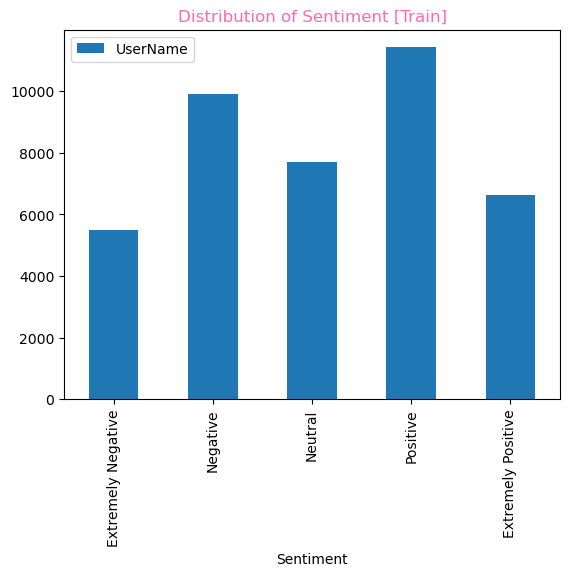

In [6]:
import matplotlib.pyplot as plt
df_train.groupby(['Sentiment']) \
.count()[['UserName']] \
.reindex(['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']) \
.plot(kind="bar")
plt.title("Distribution of Sentiment [Train]",color='hotpink')
plt.show()

In [7]:
#Dropping irrelevant columns
df_train=df_train.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [8]:
import re

In [9]:
def hashtags_removal(text):
    hashtags = "#[\S]+"
    text = re.sub(hashtags,"",text)
    return text
#Remove Hashtags train
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x:hashtags_removal(x))

In [10]:
def mentions_removal(text):
    mentions = "@[\S]+"
    text = re.sub(mentions,"",text)
    return text
#Remove Mention train
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x:mentions_removal(x))

In [11]:
def url_removal(text):
    url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
    text = re.sub(url,"",text)
    return text
#Remove URL train
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: url_removal(x))

In [12]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
df_train['OriginalTweet']=df_train['OriginalTweet'].str.lower()

In [14]:
import nltk
from nltk.stem import PorterStemmer

In [15]:
stemmer = PorterStemmer()

In [16]:
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

In [17]:
df_train["OriginalTweet"] = df_train["OriginalTweet"].apply(stem_sentence)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [19]:
def preprocess_review(text):
    #Convert to lower case
    text=text.lower()
    #Remove Numbers
    text=re.sub(r'\d+','',text)
    #Remove Punctuations
    text=re.sub(r'[^\w\s]','',text)
    #Splitting into tokens
    tokens=text.split()
    #Filter the Tokens
    clean_tokens=[tok for tok in tokens if tok not in stop and len(tok)>1]
    #Joining the Tokens
    clean_text=' '.join(clean_tokens)
    return clean_text

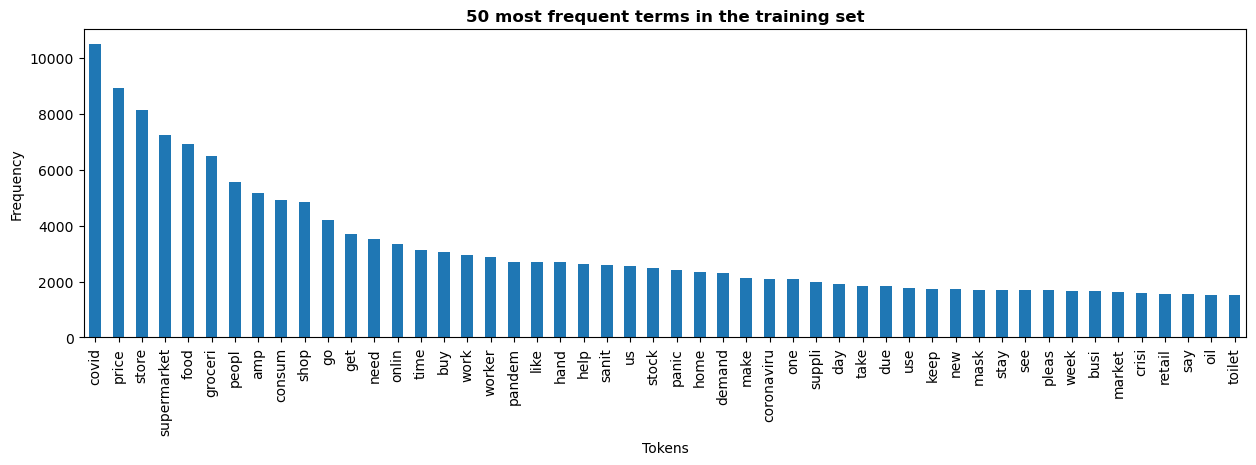

In [20]:
df_train["clean_text"]=df_train["OriginalTweet"].apply(preprocess_review)
# Get 50 most frequent words in the training set
frequent_words = pd.Series(' '.join(df_train.clean_text).split()).value_counts() [:50] 
frequent_words.plot.bar(figsize=(15,4))
plt.title ('50 most frequent terms in the training set', fontweight="bold") 
plt.xlabel('Tokens')
plt.ylabel("Frequency")
plt.show()

In [21]:
import gc
del frequent_words
gc.collect()

10493

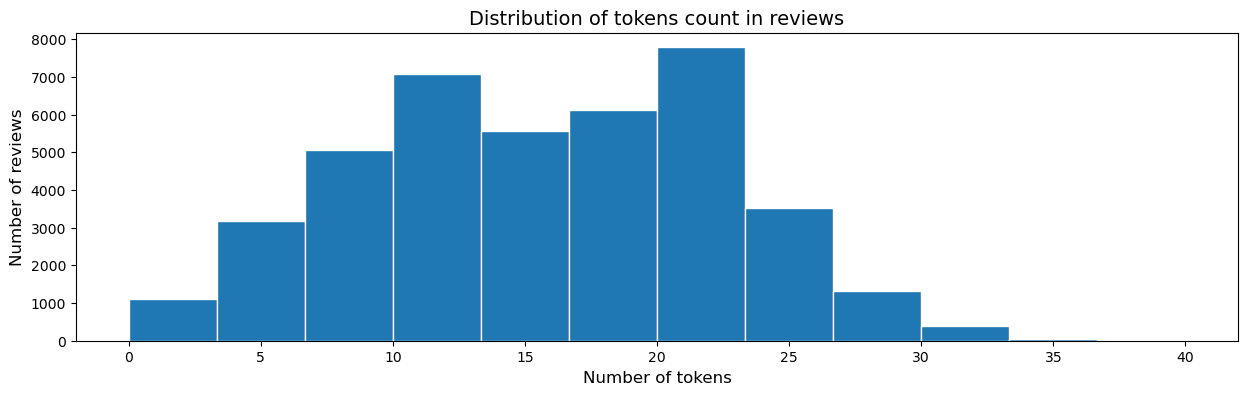

In [22]:
# Plot the number of tokens in cleaned reviews
plt.figure(figsize= (15,4))
plt.hist (df_train['clean_text'].apply(lambda x:len(x.split())), bins=12, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.title('Distribution of tokens count in reviews',fontsize=14)
plt.show ()

In [23]:
less_than_250 = df_train['clean_text'].apply(lambda x:len(x.split()))<250
print(f"{(sum(less_than_250) / len(df_train) * 100):.2f}% of rows have less than 250 tokens.")

100.00% of rows have less than 250 tokens.


In [24]:
#Remove original text column
df_train = df_train.drop(columns= ['OriginalTweet'])
df_train.head()

,Sentiment,clean_text
0,Neutral,
1,Positive,advic talk neighbour famili exchang phone numb...
2,Positive,coronaviru australia woolworth give elderli di...
3,Positive,food stock one empti pleas panic enough food e...
4,Extremely Negative,readi go supermarket outbreak paranoid food st...


**TEST Dataset**

In [25]:
df_test = pd. read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding="latin-1")
df_test.sample ()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
75,76,45028,KÂjipuktuk/Halifax,10-03-2020,My genuine concern around #COVID2019 are folks...,Extremely Negative


In [26]:
#Dropping irrelevant columns
df_test=df_test.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [27]:
def hashtags_removal(text):
    hashtags = "#[\S]+"
    text = re.sub(hashtags,"",text)
    return text
#Remove Hashtags train
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x:hashtags_removal(x))

def mentions_removal(text):
    mentions = "@[\S]+"
    text = re.sub(mentions,"",text)
    return text
#Remove Mention train
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x:mentions_removal(x))

def url_removal(text):
    url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
    text = re.sub(url,"",text)
    return text
#Remove URL train
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: url_removal(x))

# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
df_test['OriginalTweet']=df_test['OriginalTweet'].str.lower()

df_test["OriginalTweet"] = df_test["OriginalTweet"].apply(stem_sentence)

In [29]:
df_test["clean_text"]=df_test["OriginalTweet"].apply(preprocess_review)

#Remove original text column
df_test = df_test.drop(columns= ['OriginalTweet'])
df_test.head()

,Sentiment,clean_text
0,Extremely Negative,trend new yorker encount empti supermarket she...
1,Positive,find hand sanit fred meyer turn pack purel che...
2,Extremely Positive,find protect love one
3,Negative,buy hit citi anxiou shopper stock food amp med...
4,Neutral,one week everyon buy babi milk powder next eve...


In [30]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df_train['Sentiment']=label_encoder.fit_transform(df_train['Sentiment'])
df_test['Sentiment']=label_encoder.fit_transform(df_test['Sentiment'])

**Splitting the Data**

In [31]:
 #Create X ,y arrays
from sklearn.model_selection import train_test_split
# Training data
X_train = df_train["clean_text"].values
y_train = df_train["Sentiment"].values
# Splitting into train/test sets
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
# Testdata
X_te = df_test["clean_text" ].values
print("Training Data: ",X_tr.shape, y_tr.shape)
print("Validation Data: ",X_va.shape, y_va.shape)
print("Test Data: ",X_te.shape)

Training Data:  (32925,) (32925,)
Validation Data:  (8232,) (8232,)
Test Data:  (3798,)


**Model Part**

In [32]:
import warnings
warnings.filterwarnings ("ignore")
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu) 
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy 
except ValueError:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:',strategy.num_replicas_in_sync)

Number of replicas: 1


In [33]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver () # TPUdetection
except ValueError:
    tpu=None
    gpus=tf.config.experimental.list_logical_devices ("GPU")
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental. TPUStrategy(tpu,)
    print('Running on TPU ',tpu.cluster_spec().as_dict ()['worker']) 
elif len(gpus)>1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on Multiple GPUs ',[gpu.name for gpu in gpus])
elif len(gpus)==1:
    strategy = tf.distribute.get_strategy()
    print('Running on single GPU ',gpus[0].name) 
else:
    strategy = tf.distribute.get_strategy()
    print('Running on single CPU ') 
print("Number of accelerators: ",strategy.num_replicas_in_sync)


Running on single CPU 
Number of accelerators:  1


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer =Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_tr)

max_seq_length = 250

X_tr_seq = tokenizer.texts_to_sequences (X_tr)
X_tr_seq = pad_sequences (X_tr_seq, maxlen=max_seq_length)
X_va_seq = tokenizer.texts_to_sequences (X_va)
X_va_seq = pad_sequences (X_va_seq, maxlen=max_seq_length)
X_te_seq = tokenizer.texts_to_sequences (X_te)
X_te_seg = pad_sequences (X_te_seq, maxlen=max_seq_length)


In [35]:
X_tr_seq

array([[   0,    0,    0, ...,  440,  357,  257],
       [   0,    0,    0, ...,   30,  163,    4],
       [   0,    0,    0, ..., 3581,  272, 6854],
       ...,
       [   0,    0,    0, ..., 1734, 1752, 9614],
       [   0,    0,    0, ...,  141,  621,   82],
       [   0,    0,    0, ...,  197,  241,   91]], dtype=int32)

In [36]:
X_va_seq

array([[   0,    0,    0, ..., 1798, 1856,  930],
       [   0,    0,    0, ...,  251,  607,  515],
       [   0,    0,    0, ...,  344,  279, 3623],
       ...,
       [   0,    0,    0, ...,    3,  660,   93],
       [   0,    0,    0, ...,  823,    8,  119],
       [   0,    0,    0, ...,   76,  267,   64]], dtype=int32)

In [37]:
X_te_seq

[[405, 40, 3760, 3565, 145, 4, 62, 865, 4503, 3487, 14, 1372, 226, 25],
 [106, 21, 23, 4214, 4491, 388, 387, 3000, 140, 313, 258, 2],
 [106, 70, 306, 30],
 [16,
  207,
  343,
  2023,
  226,
  25,
  5,
  8,
  186,
  32,
  18,
  346,
  629,
  732,
  575,
  1909,
  664],
 [30, 43, 86, 16, 834, 358, 4903, 173, 86, 16, 52, 55],
 [338, 117, 15, 470, 1034, 824, 154, 1538, 1643, 2, 1131, 11, 69, 68, 2, 323],
 [1153, 748, 21, 23],
 [280, 65, 230, 70, 2, 1318, 36, 61, 17613, 2105, 8, 2706, 305, 2249, 111],
 [812,
  1405,
  1673,
  164,
  21,
  23,
  98,
  1227,
  20,
  36,
  517,
  288,
  1109,
  332,
  38,
  368,
  240,
  8547,
  310,
  69,
  117,
  419,
  310,
  184,
  391,
  7],
 [201,
  4,
  117,
  33,
  167,
  259,
  10,
  117,
  638,
  8,
  2006,
  4152,
  18260,
  2732,
  1088,
  409,
  1611,
  3011],
 [239, 1219, 5531, 2428, 136, 2, 161, 82, 2813, 487, 2064],
 [1455, 4880, 109, 164, 759, 36, 871, 2, 157, 2578, 29, 813, 590],
 [26,
  5,
  16,
  1715,
  34,
  2181,
  287,
  599,
  26,
  16

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout 
from tensorflow.keras.optimizers import Adam

with strategy.scope () :
    model = Sequential ()
    model.add(Embedding (input_dim=20000, output_dim=128, input_length=250))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization ())
    model.add(Dropout (0.2))
    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization ())
    model.add(Dropout (0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.2))
    model.add(Dense(units=6,activation='softmax'))
    model.compile(optimizer=Adam(learning_rate =1e-4),loss = 'sparse_categorical_crossentropy', metrics= ['acc' ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 248, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 124, 128)         66048     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 124, 128)         512       
 ormalization)                                                   
                                                        

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
# Creates 'EarlyStoppcinagll'back
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [40]:
X_tr_seq.shape

(32925, 250)

In [41]:
y_tr.shape

(32925,)

In [42]:
X_va_seq. shape

(8232, 250)

In [43]:
history = model.fit(X_tr_seq, y_tr,validation_data=(X_va_seq, y_va),callbacks=[earlystopping_cb], batch_size=70,epochs=15,verbose=1,)

Epoch 1/15
471/471 [==============================] - 267s 547ms/step - loss: 2.0056 - acc: 0.2648 - val_loss: 1.7437 - val_acc: 0.3370
Epoch 2/15
471/471 [==============================] - 255s 542ms/step - loss: 1.4295 - acc: 0.4482 - val_loss: 1.2881 - val_acc: 0.5064
Epoch 3/15
471/471 [==============================] - 252s 535ms/step - loss: 1.0180 - acc: 0.6161 - val_loss: 1.0490 - val_acc: 0.5944
Epoch 4/15
471/471 [==============================] - 252s 535ms/step - loss: 0.7537 - acc: 0.7328 - val_loss: 1.0630 - val_acc: 0.6173
Epoch 5/15
471/471 [==============================] - 250s 532ms/step - loss: 0.5603 - acc: 0.8137 - val_loss: 1.0659 - val_acc: 0.6424
Epoch 6/15
471/471 [==============================] - 254s 539ms/step - loss: 0.4268 - acc: 0.8670 - val_loss: 1.1834 - val_acc: 0.6344
Epoch 7/15
471/471 [==============================] - 250s 532ms/step - loss: 0.3216 - acc: 0.9053 - val_loss: 1.6163 - val_acc: 0.5375


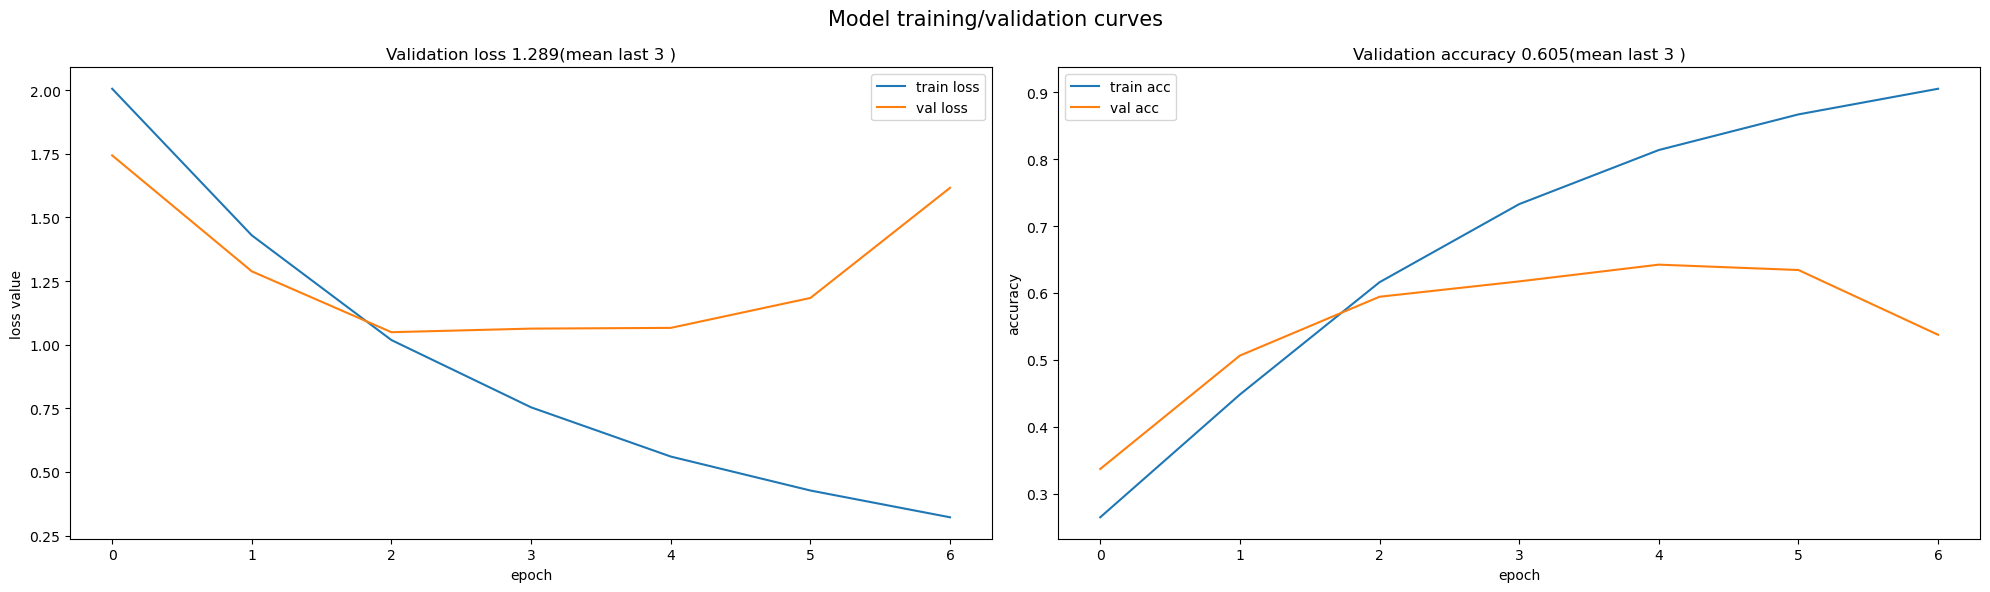

In [44]:
import numpy as np
# Create two plots:one for the loss value,one for the accuracy 
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plt.suptitle('Model training/validation curves', size=15)
# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title("Validation loss {:.3f}(mean last 3 )".format(np.mean(history.history["val_loss"][-3:])))
ax1.set_xlabel("epoch") 
ax1.set_ylabel("loss value")
ax1.legend()

#Plot accuracy values
ax2.plot (history.history["acc"], label="train acc") 
ax2.plot (history.history["val_acc"], label="val acc") 
ax2.set_title("Validation accuracy {:.3f}(mean last 3 )".format(np.mean(history.history["val_acc"][-3:])))
ax2.set_xlabel("epoch") 
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [45]:
test_loss, test_acc = model.evaluate (X_va_seq,y_va)
print('Validation loss: ' , test_loss)
print('Validation accuracy: ',test_acc)

258/258 [==============================] - 26s 101ms/step - loss: 1.0490 - acc: 0.5944
Validation loss:  1.0489611625671387
Validation accuracy:  0.5943877696990967


In [46]:
# Compute validation set predictions
pred = [np.argmax(i) for i in model.predict(X_va_seq)]

258/258 [==============================] - 28s 102ms/step


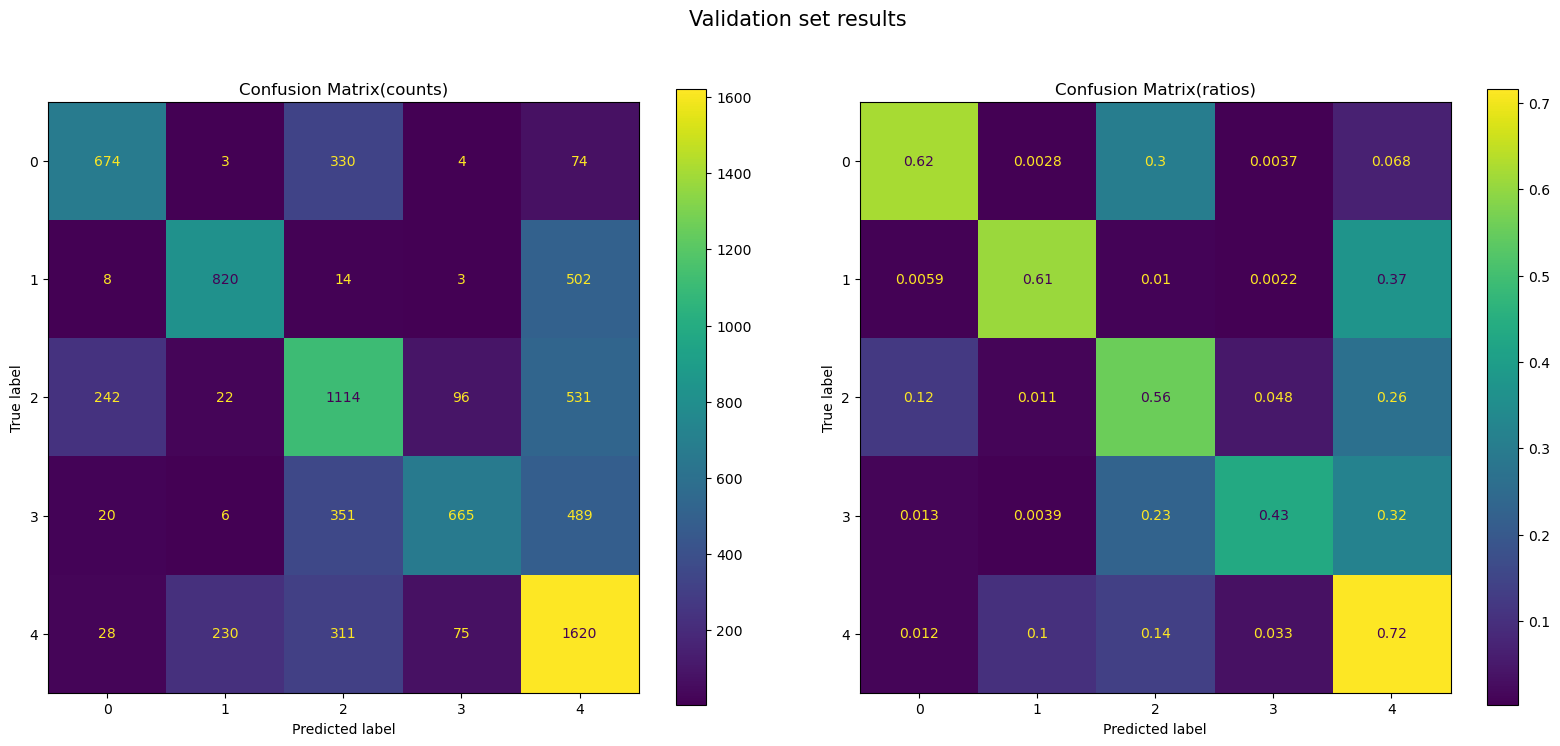

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute confusion matrix for raw counts
cm_raw=confusion_matrix(y_va, pred)
#Compute confusion matrix for normaziled ratios 
cm_norm=confusion_matrix(y_va, pred, normalize='true')
#Create confusion matrix plots
disp_raw=ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm=ConfusionMatrixDisplay(confusion_matrix=cm_norm)
#Plot confusion matrices side by side
fig,axs=plt.subplots(1, 2, figsize= (20,8), gridspec_kw={"width_ratios":[10,10],"wspace":0.1},subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size=15) 
disp_raw.plot(ax=axs[0])
axs[0].set_title("Confusion Matrix(counts)")
disp_norm.plot(ax=axs[1])
axs[1].set_title("Confusion Matrix(ratios)")
plt.show()